**\julia\test\syntax.jl 搜索Meta.parse, 能搜索到很多 Expr语法**

In [3]:
MyStr = "x = 2"
MyExpr = Meta.parse(MyStr)
MyExpr |> display
x # Error :(x = 2) 还没有执行,所以Main没有x

:(x = 2)

UndefVarError: UndefVarError: `x` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [4]:
eval(MyExpr)
x

2

### https://docs.juliacn.com/latest/manual/metaprogramming/

In [7]:
# 程序是文本字符串语句,程序执行分为两大阶段：
# 解析字符串成表达式、运行表达式

prog = "1 + 1"
parse_ex = Meta.parse(prog)
parse_ex |> display
parse_ex |> typeof |> display

fieldnames(Expr) |> display
propertynames(parse_ex)

:(1 + 1)

Expr

(:head, :args)

(:head, :args)

In [29]:
parse_ex.head |> display
parse_ex.head |> typeof |> display
parse_ex.args |> display

parse_ex.args[3] = 2
parse_ex |> display

eval(parse_ex.head) |> display

:call

Symbol

3-element Vector{Any}:
  :+
 1
 2

:(1 + 2)

UndefVarError: UndefVarError: `call` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [12]:
dump(parse_ex)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Int64 1
    3: Int64 2


In [21]:
Meta.@dump parse_ex 
# 带@的函数为宏函数, 会把其后的参数接收为表达式, 若为变量则接收为Symbol

Symbol parse_ex


In [22]:
Meta.@dump 1+2
# 带@的函数为宏函数, 会把其后的参数接收为表达式, 若为变量则接收为Symbol

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Int64 1
    3: Int64 2


In [13]:
# Expr 对象也可以嵌套：
parse_nest_ex = Meta.parse("(4 + 4) / 2")
parse_nest_ex |> display
Meta.show_sexpr(parse_nest_ex)

:((4 + 4) / 2)

(:call, :/, (:call, :+, 4, 4), 2)

In [14]:
using TreeView

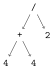

In [16]:
# 参数是表达式变量名时 用TreeView.walk_tree()图示tree(抽象语法树)
TreeView.walk_tree(parse_nest_ex)

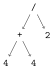

In [19]:
@tree (4 + 4) / 2
# 带@的函数为宏函数, 会把其后的参数接收为表达式, 若为变量则接收为Symbol

In [20]:
dump(parse_nest_ex)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol /
    2: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Int64 4
        3: Int64 4
    3: Int64 2


In [23]:
typeof(1+2im) |> display
dump(1+2im)

Complex{Int64}

Complex{Int64}
  re: Int64 1
  im: Int64 2


In [24]:
dump(:(b=1+1))

Expr
  head: Symbol =
  args: Array{Any}((2,))
    1: Symbol b
    2: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Int64 1
        3: Int64 1


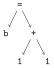

In [25]:
@tree b=1+1

### https://developer.aliyun.com/article/786911

引用自定义的函数

In [1]:
function myf(x,y)
    x + y + 1
end

:(myf(1,2))

:(myf(1, 2))

In [3]:
eval(:(myf(1,2)))

4

In [4]:
ex = Meta.parse("myf(1,2)+3")

:(myf(1, 2) + 3)

In [5]:
eval(ex)

7

In [9]:
ex2 = Meta.parse("A2= [ 1 2 3 ; 4 5 6]")

:(A2 = [1 2 3; 4 5 6])

In [7]:
A2

UndefVarError: UndefVarError: `A2` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [10]:
eval(ex2)

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [11]:
A2

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

`Meta.parse`方法也支持多行语句，中间用`;`分隔

In [13]:
ex3 = Meta.parse("a=1;b=2;z=sin(a)*b")

:($(Expr(:toplevel, :(a = 1), :(b = 2), :(z = sin(a) * b))))

In [14]:
eval(ex3)

1.682941969615793